<div class="alert alert-block alert-warning">
For all of the datasets below:<br>
    - examine the data types of each column.<br>
    - ensure that the dates are in the proper format.<br>
    - set the dataframe's index to the date column as appropriate.<br>
    - For this exercise you'll need to install a library that will provide us access to some more datasets:<br>
    pip install vega_datasets</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vega_datasets import data

In [25]:
# Load San Fransico temperatue data

df = data.sf_temps()
df.shape

(8759, 2)

In [26]:
# Check the dtypes of the columns
print(df.dtypes)

# Check the first 5 rows of the dataset
df.head() # date col is not in proper format and is not index. 

temp           float64
date    datetime64[ns]
dtype: object


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [27]:
# Remove the time from the datetime
df.date = pd.to_datetime(df.date.dt.date) # Make sure add pd.to_datetime() because df.date.dt.date returns str

# Print dtypes of the columns
print(df.dtypes)

# Check the first 5 rows of the dataset
df.head() # Column date is in proper format

temp           float64
date    datetime64[ns]
dtype: object


,temp,date
0,47.8,2010-01-01
1,47.4,2010-01-01
2,46.9,2010-01-01
3,46.5,2010-01-01
4,46.0,2010-01-01


In [28]:
# Set the date column as the index and sort the index
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01,47.8
2010-01-01,47.4
2010-01-01,46.9
2010-01-01,46.5
2010-01-01,46.0


In [32]:
# Print the shape and dtypes of the df
print(df.shape)
df.dtypes

(8759, 1)


temp    float64
dtype: object

# Remove time from datetime

df.date = pd.to_datetime(df.date.dt.date) # Make sure add pd.to_datetime() because df.date.dt.date returns str.
df.dtypes # date col is now in proper format

Use the above dataset for the exercises below:
1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [29]:
# Resample by day and take the average temerature
df.resample('1d').mean() # 365 rows, 1 date per row

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


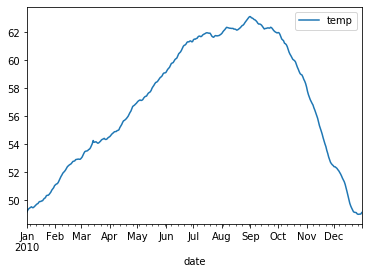

In [30]:
# Visualize the average temperature over time
df.resample('1d').mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

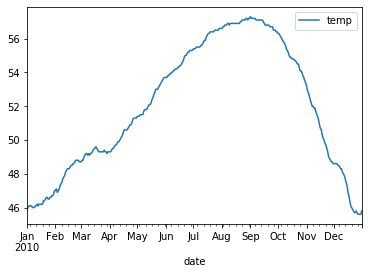

In [31]:
df.resample('1d').min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

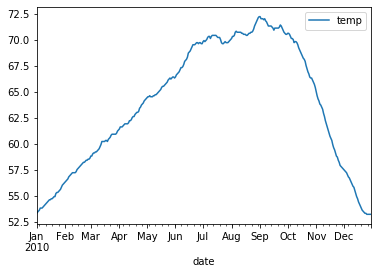

In [33]:
df.resample('1d').max().plot()

4. Which month is the coldest, on average?

In [56]:
# Resample by month, take the mean, order by temperature ascendinlgy, and take the first one
df.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


5. Which month has the highest average temperature?

In [51]:
# Resample by month, take the mean, order by temperature ascendingly, and take the last one
df.resample('M').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [97]:
# Resample by the day and compute the min and max

df_d_minmax = df.resample('d').agg(['min', 'max'])
df_d_minmax.head() # Contain multi index column names

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [98]:
# Print out the column names
df_d_minmax.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [99]:
# Flat the multi-index column names

df_d_minmax.columns = df_d_minmax.columns.get_level_values(1)
df_d_minmax.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [100]:
# Compute the change in temperature for the day

df_d_minmax['tempdeltas'] = df_d_minmax['max'] - df_d_minmax['min']

print(df_d_minmax.shape)
df_d_minmax.head()

(365, 3)


,min,max,tempdeltas
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [92]:
# Resample by month, calculate the max temp for each month, order by temperature change ascendinlgy
# and take the last one

df_d_minmax.resample('M').max().sort_values(by='tempdeltas').tail(1)

,min,max,tempdeltas
date,,,
2010-08-31,57.2,72.2,15.0


7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

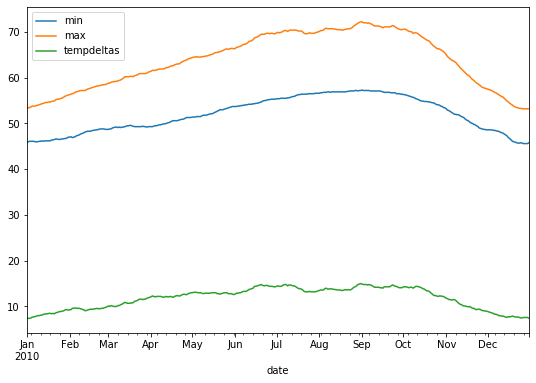

In [96]:
df_d_minmax.plot(figsize=(9,6))

<div class="alert alert-block alert-warning">
Preprocess:<br>
    - examine the data types of each column.<br>
    - ensure that the dates are in the proper format.<br>
    - set the dataframe's index to the date column as appropriate.</div>

In [102]:
# Read the data
df = data.seattle_weather()

# Print the dtypes
print(df.dtypes)

# Print the shape
print(df.shape)

df.head() # Column date is in proper format but no set as the index

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object
(1461, 6)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [104]:
# Set the date column as the index and sort the index in ascending order.
df = df.set_index('date').sort_index()

# Print the dtypes
print(df.dtypes)

# Print the shape
print(df.shape)

df.head() # Ready for the exercise

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object
(1461, 5)


,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


1. Which year and month combination has the highest amount of precipitation?

In [124]:
# Resample by month, compute the sum, order by temperature ascendingly, and take the last one
df.resample('M').sum().sort_values(by = 'precipitation').tail(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6


2. Visualize the amount of monthly precipitation over time.

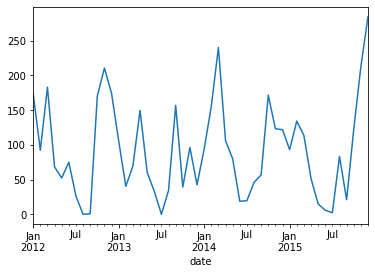

In [114]:
# Resample by month, compute the sum, 
# Select column precipitation and plot

df.resample('M').sum().precipitation.plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

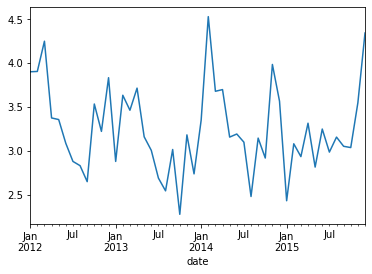

In [121]:
df.resample('M').mean().wind.plot()

4. Which year-month combination is the windiest?

In [127]:
df.resample('M').mean().sort_values(by='wind').tail(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [131]:
# How many unique values in weather columns
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [136]:
# Create dummy varibles for weather
df_dummies = pd.get_dummies(df.weather)  # pd.get_dummies()

# Concat df with df_dummies
df = pd.concat([df, df_dummies], axis=1)

# Print shape of df
df.shape

# Print .head()
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,rain,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2.3,rain,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4.7,rain,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6.1,rain,0,0,1,0,0


In [139]:
# Resample by year and sum up the sunny days
# Order ascendingly and take the last one

df.resample('Y').sum().sort_values(by='sun').tail(1)

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
date,,,,,,,,,
2014-12-31,1232.8,6203.5,3161.8,1236.5,0,151,3,0,211


6. In which month does it rain the most?

In [148]:
# Create a column month
df['month'] = df.index.month

# Group the df by month
df.groupby('month').rain.sum().sort_values().tail(1)

month
2    40
Name: rain, dtype: uint8

In [155]:
df.resample('M').sum().sort_values(by='rain', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun,month
date,,,,,,,,,,
2012-11-30,210.5,339.8,156.8,96.6,2,1,25,0,2,330


7. Which month has the most number of days with a non-zero amount of precipitation?

In [161]:
# Create a column to indacte whether there is precipiation or not on a daily basis
df['non_zero_precipitation'] = df.precipitation.apply(lambda i: 1 if i != 0 else 0)
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun,month,non_zero_precipitation
date,,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0,1,0
2012-01-02,10.9,10.6,2.8,4.5,rain,0,0,1,0,0,1,1
2012-01-03,0.8,11.7,7.2,2.3,rain,0,0,1,0,0,1,1
2012-01-04,20.3,12.2,5.6,4.7,rain,0,0,1,0,0,1,1
2012-01-05,1.3,8.9,2.8,6.1,rain,0,0,1,0,0,1,1


In [165]:
# Resample by month, compute the totla number of days with a non-zero precipiation
# Order descendingly and show the first one. 

df.resample('M').sum().sort_values(by='non_zero_precipitation', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun,month,non_zero_precipitation
date,,,,,,,,,,,
2012-12-31,174.0,224.3,102.1,118.8,2,0,23,5,1,372,27


In [169]:
# Group by month and calculate the total number of days with a non-zero precipiation
# Order descendingly and show the first one. 

df.groupby('month').non_zero_precipitation.sum().\
sort_values(ascending=False).head(1)

month
12    81
Name: non_zero_precipitation, dtype: int64

<div class="alert alert-block alert-warning">
Preprocess:<br>
    - examine the data types of each column.<br>
    - ensure that the dates are in the proper format.<br>
    - set the dataframe's index to the date column as appropriate.</div>

In [44]:
# Load the dataset

df = data.flights_20k()

# Print out the shape and dtypes of df

print(df.dtypes)
print(df.shape)

# Quickview of df

df.head() # The column date is not in proper format and set as index

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object
(20000, 5)


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [46]:
# Since the question invovles time so just set the date as index
df = df.set_index('date').sort_index()

# Print out the shape and dtypes of df

print(df.dtypes)
print(df.shape)

# Quickview of df
df.head() # Date is the index and the df is ready for exploration

delay           int64
distance        int64
origin         object
destination    object
dtype: object
(20000, 4)


,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


1. Convert any negative delays to 0.

In [47]:
# Use lambda to convert the negative delays to 0

df.delay = df.delay.apply(lambda i: 0 if i < 0 else i)

# Quickview of df
df.head() # Convert successful

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


2. Which hour of the day has the highest average delay?

In [48]:
# Resample by hour and compute the total delay in each hour in every day. 
df_h = df.resample('H').sum()

# Create a hour column to hold hours
df_h['hour'] = df_h.index.hour

# Quickive of the df_h
df_h.head()

,delay,distance,hour
date,,,
2001-01-01 00:00:00,14,405,0
2001-01-01 01:00:00,0,0,1
2001-01-01 02:00:00,0,0,2
2001-01-01 03:00:00,0,0,3
2001-01-01 04:00:00,0,0,4


In [49]:
# Group the df_h by hour and compute the average dealy for the hour of the day
# Order descendingly and show the first one

df_h.groupby('hour').delay.mean().sort_values(ascending=False).head(1)

hour
20    223.622222
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?

In [50]:
# Resample by day and compute the total delay daily. 
df_d  = df.resample('D').sum()

# Add a column showing the names of the day
df_d['day_name'] = df_d.index.day_name()

# Quickview of the df_d
df_d.head()

,delay,distance,day_name
date,,,
2001-01-01,1522,98785,Monday
2001-01-02,4667,105183,Tuesday
2001-01-03,4116,117357,Wednesday
2001-01-04,1665,115212,Thursday
2001-01-05,2212,115322,Friday


In [53]:
# Group the records by day_name and average the delay amount

df_d.groupby('day_name').delay.mean().sort_values() # Clearly, there is a difference for the day of the way

day_name
Saturday     1519.615385
Monday       1642.615385
Tuesday      2131.923077
Sunday       2268.416667
Wednesday    2613.000000
Thursday     2969.615385
Friday       4136.153846
Name: delay, dtype: float64

3. Does the month make a difference in the delay amount?

In [56]:
# Resample by month and compute the total delay for each month
df.resample('M').sum() # Yes, March has 10% less delay amount than Jan and Feb. 

,delay,distance
date,,
2001-01-31,76670,3394659
2001-02-28,76987,3197793
2001-03-31,68732,3512796
